### RI TP7

In [79]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import Document
import porter
import TextRepresenter
import Parser
import ParserCACM
from index import *
from weighter import *
from modeles import *
from evaluation import *
from QueryParser import *
from RandomModel import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from clustering import *
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
index = Index("easyCLEF08")

In [3]:
index.indextion(source = 'easyCLEF08/easyCLEF08_text.txt')

In [4]:
index.indextion_inverse(source = "easyCLEF08/easyCLEF08_text.txt")

In [3]:
index

In [50]:
porter = TextRepresenter.PorterStemmer()
query_parser = QueryParser(TextRepresenter.PorterStemmer())
query_parser.initQry('easyCLEF08/easyCLEF08_query.txt')
query_parser.initRel('easyCLEF08/easyCLEF08_gt.txt')
queries = []
for i in range(0,39):
    q =query_parser.nextQuery()
    queries.append(q)

### Comparaison des Méthodes :

In [88]:
weighter = Weighter_01(index)
model = Vectoriel(index, weighter, True)

In [89]:
weighter = Weighter_01(index)
model_vect = Vectoriel(index, weighter, True)
model_l = ModelLangue(index, 0.05)
model_o = ModelBM25(index)
models = [model_vect, model_l, model_o]

In [90]:
pn20 = []
crn20 = []
for i in models:
    
    Eval = Pn(i, queries, 20)
    pn20.append(Eval.Evaluation_queries())
    Eval2 = CRn(i, queries, 20)
    crn20.append(Eval2.Evaluation_queries())
    

/Users/macos/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))


In [91]:
print(pn20, crn20)

[0.22948717948717942, 0.23974358974358972, 0.6576923076923078] [0.29853314962010613, 0.24684518380170553, 0.574311236267758]


In [92]:
result = pd.DataFrame([pn20,crn20], index = ["P@20", "CR@20"], columns = ['Vectoriel', 'ModelLangue', 'BM25'])
result

,Vectoriel,ModelLangue,BM25
P@20,0.229487,0.239744,0.657692
CR@20,0.298533,0.246845,0.574311


In [56]:
result = pd.DataFrame([pn20,crn20], index = ["P@10", "CR@10"], columns = ['Vectoriel', 'ModelLangue', 'BM25'])
result

,Vectoriel,ModelLangue,BM25
P@10,0.215385,0.223077,0.674359
CR@10,0.173756,0.158160,0.444638


# choix de l'algorithme clustering:

## Model BM25 avec Clustering:

## Birch:

In [4]:
model = ModelLangue(index, 0.05)

In [80]:
resB = []
perresB = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [1, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90]:
    print(i)
    birch = Birch(  n_clusters=i, threshold=0.5, compute_labels=True)
    modelClus = ClusteringModel(index, model, birch)
    EvalCRn = CRn(modelClus, queries, 20)
    resB.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    perresB.append(EvalPn.Evaluation_queries())

1
5
10
15
20
25
30
35
40
45
50
55
60
65


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (62) by Birch is less than (65). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (62) by Birch is less than (65). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


80


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (72) by Birch is less than (80). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (75) by Birch is less than (80). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (62) by Birch is less than (80). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (72) by Birch is less than (80). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629:

90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (72) by Birch is less than (90). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (84) by Birch is less than (90). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (87) by Birch is less than (90). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (82) by Birch is less than (90). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629:

In [83]:
print(resB, perresB)

[0.574311236267758, 0.5334435693131345, 0.5307583720627199, 0.5745414408457886, 0.5962662136575181, 0.6048089993742168, 0.6276868461651071, 0.6368249303031912, 0.6443646128428737, 0.6453922888705497, 0.6350193284975894, 0.646557790036051, 0.6463700148482757, 0.6475355160137769, 0.626455991673383, 0.6060833691268475] [0.6576923076923078, 0.4384615384615385, 0.391025641025641, 0.41282051282051285, 0.3448717948717949, 0.3974358974358974, 0.432051282051282, 0.46538461538461534, 0.47564102564102567, 0.4961538461538461, 0.5217948717948718, 0.535897435897436, 0.5538461538461539, 0.5641025641025641, 0.6102564102564103, 0.6294871794871794]


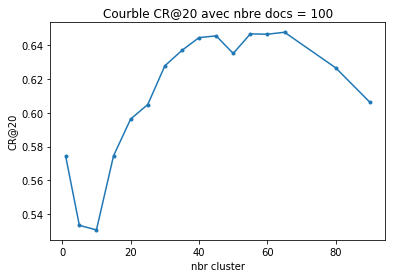

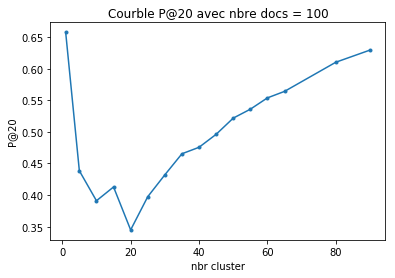

In [82]:
plt.plot([1, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], resB, marker = '.')
plt.title("Courble CR@20 avec nbre docs = 100", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([1, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], perresB, marker = '.')
plt.title("Courble P@20 avec nbre docs = 100")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()


In [85]:
rn = []
pn = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [100, 200, 400, 600,800,1000]:
    print(i)
    birch = Birch(  n_clusters=i, threshold=0.5, compute_labels=True)
    modelClus = ClusteringModel(index, model, birch, nbrDocs = i)
    EvalCRn = CRn(modelClus, queries, 20)
    rn.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    pn.append(EvalPn.Evaluation_queries())

100


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (96) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (91) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (98) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (72) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (97) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (96) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (91) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (98) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (89) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (97) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


200


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (183) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (184) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (194) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (153) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (193) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (184) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (192) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (199) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (187) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (182) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (182) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (178) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

400


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (374) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (353) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (392) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (330) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (392) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (369) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (383) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (397) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (386) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (347) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (363) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (347) by Birch is less than (400). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

600


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (573) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (530) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (586) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (507) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (586) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (565) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (569) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (587) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (578) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (528) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (551) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (542) by Birch is less than (600). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

800


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (764) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (723) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (768) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (705) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (771) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (758) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (765) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (766) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (756) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (724) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (721) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (737) by Birch is less than (800). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch

1000


/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (945) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (898) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (953) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (895) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/b

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (955) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (937) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (952) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (952) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/b

/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (944) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (918) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (889) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (933) by Birch is less than (1000). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/cluster/b

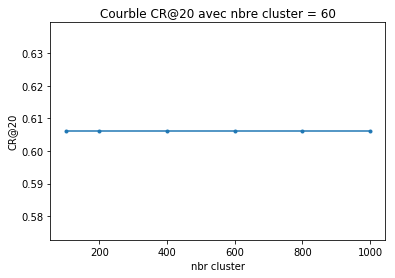

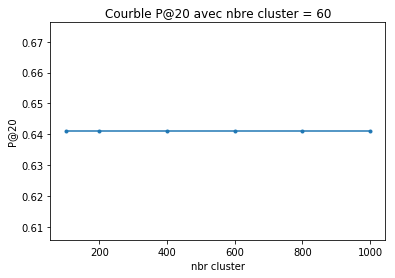

In [87]:
plt.plot([100, 200, 400, 600,800,1000], rn, marker = '.')
plt.title("Courble CR@20 avec nbre cluster = 60", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([100, 200, 400, 600,800,1000], pn, marker = '.')
plt.title("Courble P@20 avec nbre cluster = 60")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()

## Kmeans 

#### RANG:

In [51]:
res = []
perres = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [1, 3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90]:
    print(i)
    kmeans = KMeans(n_clusters= i, random_state=0, max_iter = 10000)
    modelClus = ClusteringModel(index, model, kmeans)
    EvalCRn = CRn(modelClus, queries, 20)
    res.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    perres.append(EvalPn.Evaluation_queries())
    


1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster ######################## 1
taille cluster #################

taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ######################## 5
taille cluster ###################

taille cluster ######################## 15
taille cluster ######################## 15
taille cluster ######################## 15
20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille cluster ######################## 20
taille c

taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille cluster ######################## 30
taille clus

taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
taille cluster ######################## 40
45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille cluster ######################## 45
taille c

taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille cluster ######################## 55
taille clus

taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
taille cluster ######################## 65
80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille clus

/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille clus

/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
taille cluster ######################## 80
90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (87) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 87


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (88) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 88
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (84) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 84


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (83) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 83
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 80
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 75
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (87) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 87


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (88) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 88
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (84) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 84


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (83) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 83
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 80
taille cluster ######################## 90


/usr/local/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (65) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return_n_iter=True)


taille cluster ######################## 65
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90
taille cluster ######################## 90


In [62]:
print(res, perres)

[0.574311236267758, 0.5469645089210307, 0.5402514554688468, 0.5156880559054472, 0.5492507894681807, 0.5410397573441053, 0.5837272228576577, 0.5797648004169744, 0.6192795127577736, 0.6230720165502774, 0.6111013784926829, 0.6346879770792815, 0.6233269146312624, 0.6421007334050812, 0.6330958494001973, 0.6345486236790584, 0.6060833691268475] [0.6576923076923078, 0.4935897435897435, 0.45128205128205123, 0.3923076923076923, 0.41410256410256413, 0.34871794871794876, 0.391025641025641, 0.4307692307692309, 0.458974358974359, 0.4897435897435898, 0.4935897435897436, 0.5089743589743589, 0.5256410256410257, 0.5461538461538461, 0.5641025641025641, 0.6115384615384617, 0.6346153846153846]


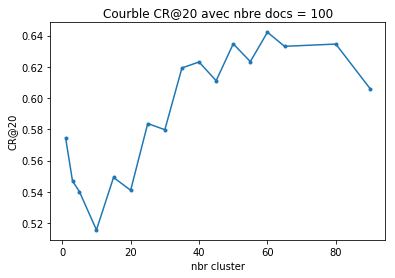

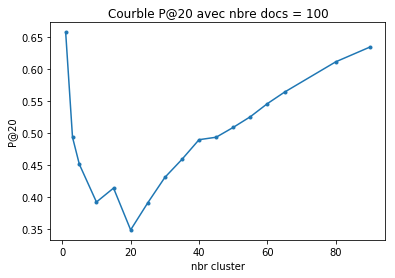

In [76]:
plt.plot([1,3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], res, marker = '.')
plt.title("Courble CR@20 avec nbre docs = 100", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([1, 3, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55, 60,65, 80, 90], perres, marker = '.')
plt.title("Courble P@20 avec nbre docs = 100")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()


In [71]:
rn = []
pn = []
model = ModelBM25(index)
#1, 3, 5, 10, 15, 20, 25, 30, 40, 45, 50, 60, 80, 100
for i in [100, 200, 400, 600,800,1000,1500,2000 ]:
    print(i)
    kmeans = KMeans(n_clusters= 60, random_state=0, max_iter = 10000)
    modelClus = ClusteringModel(index, model, kmeans, nbrDocs = i)
    EvalCRn = CRn(modelClus, queries, 20)
    rn.append(EvalCRn.Evaluation_queries())
    
    EvalPn = Pn(modelClus, queries, 20)
    pn.append(EvalPn.Evaluation_queries())
    

100
200
400
600
800
1000
1500


KeyboardInterrupt: 

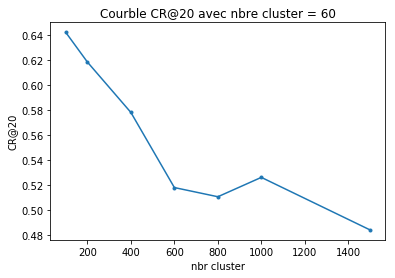

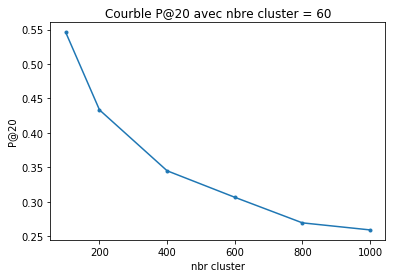

In [74]:
plt.plot([100, 200, 400, 600,800,1000,1500], rn, marker = '.')
plt.title("Courble CR@20 avec nbre cluster = 60", )
plt.xlabel("nbr cluster")
plt.ylabel("CR@20")
plt.show()

plt.plot([100, 200, 400, 600,800,1000], pn, marker = '.')
plt.title("Courble P@20 avec nbre cluster = 60")
plt.xlabel("nbr cluster")
plt.ylabel("P@20")
plt.show()